In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1
Постройте график. 
Назовите график.
Сделайте именование оси x и оси y.
Сделайте выводы.

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

Ссылка на скачивание не работает. Использовала файл, по которому делала домашние работы ко 2 и 3 семинарам.

In [2]:
df = pd.read_csv('kc_house_data.csv', encoding='cp1251')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

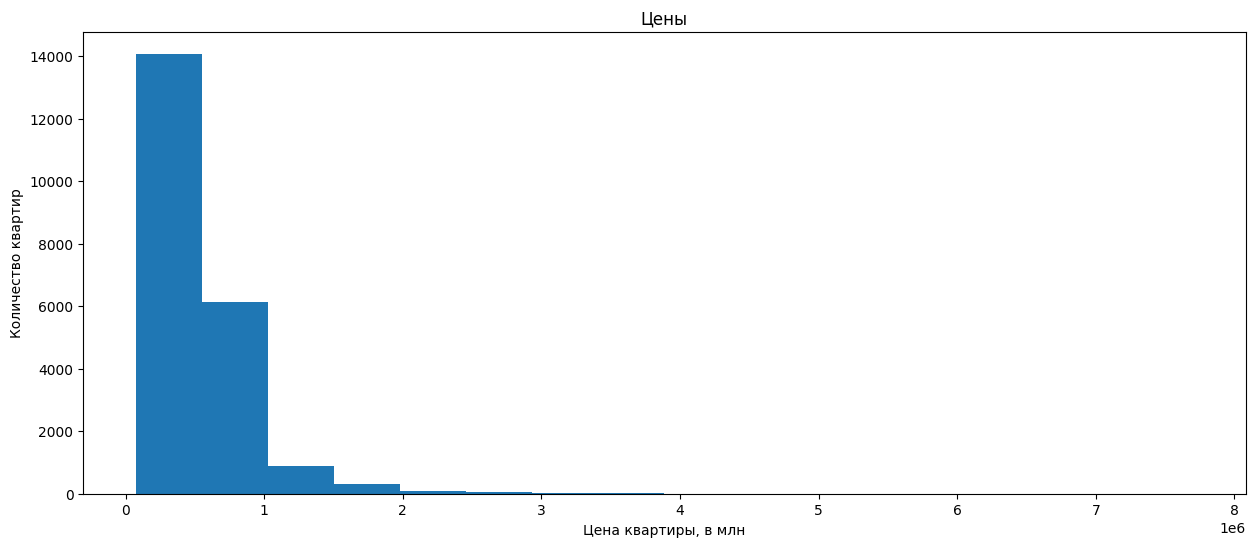

In [3]:
plt.figure(figsize=(15, 6))
plt.hist(df['price'], bins=16)
plt.title('Цены')
plt.xlabel('Цена квартиры, в млн')
plt.ylabel('Количество квартир');

Большая часть квартир (около 14 тысяч) стоят до 500 тысяч, примерно 6 тысяч квартир стоят в пределах 500-1000 тысяч. Дальше, чем дороже стоимость квартиры, тем их меньше.

### 1.3 Изучите распределение квадратуры жилой

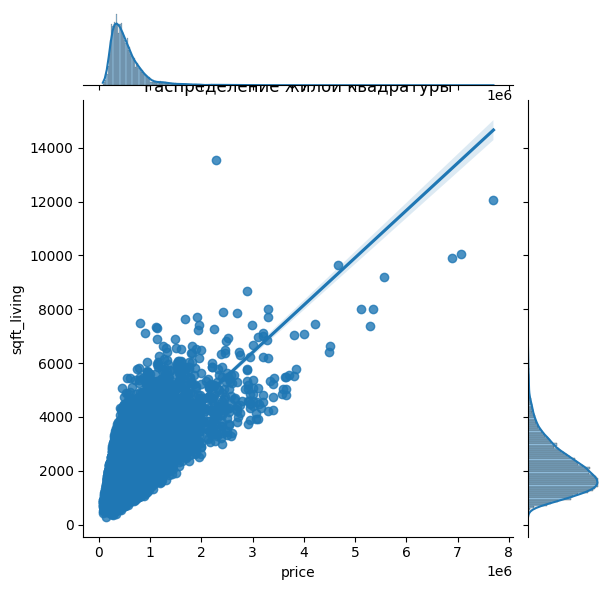

In [4]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.title('Распределение жилой квадратуры');
# plt.xlabel('Количество квартир')
# plt.ylabel('жилые кв.м.')

### 1.4 Изучите распределение года постройки

<BarContainer object of 116 artists>

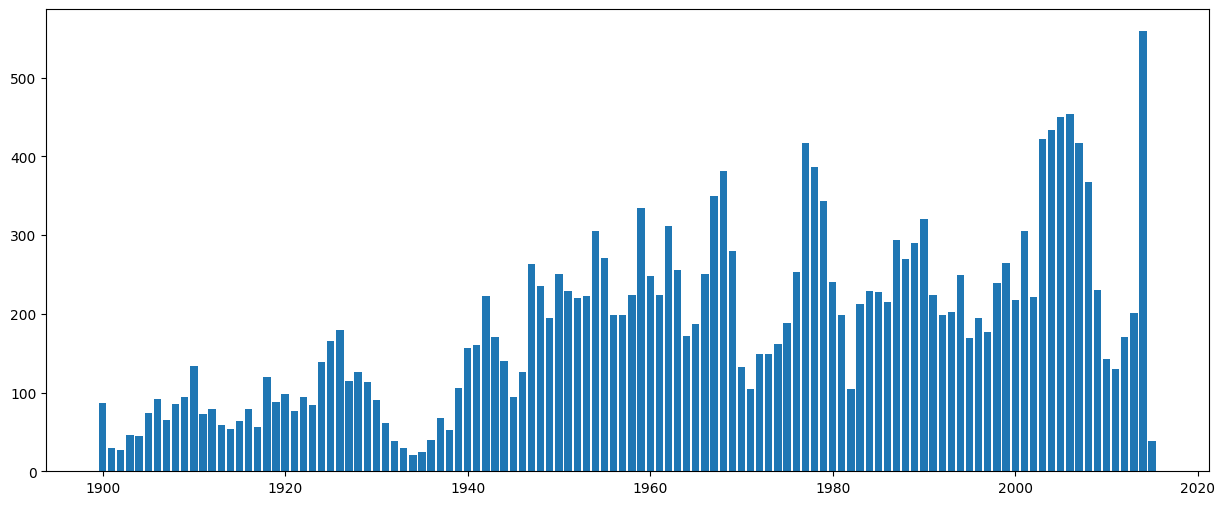

In [5]:
plt.figure(figsize=(15, 6))
plt.bar(df['yr_built'].value_counts().index, height=df['yr_built'].value_counts().values)

В графике показаны 116 столбцов (с 1900 по 2015 гг). Наибольшее количество домов было построено в 2014 г. (около 550), с 2003 по 2006 гг. примерно строились по 450 домов в год. Меньше всего домов были построены в 1934-1935 гг. - по 20.

## Задание 2

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график.
Сделайте выводы

In [6]:
date = df['waterfront'].value_counts()
date

0    21450
1      163
Name: waterfront, dtype: int64

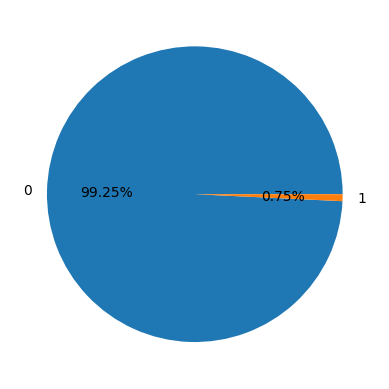

In [7]:
names = date.index
valus = date.values
plt.pie(valus, labels=names, autopct='%.2f%%');

У 0,75% квартир есть вид на набережную. 

### 2.2 Изучите распределение этажей домов

In [8]:
date_2 = df['floors'].value_counts()
date_2

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

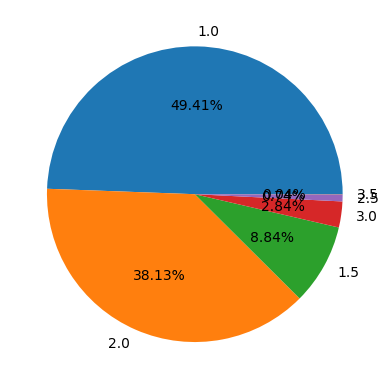

In [9]:
names_2 = date_2.index
valus_2 = date_2.values
plt.pie(valus_2, labels=names_2, autopct='%.2f%%');

Половина квартир находится на первом этаже, почти 40% - на втором, 9% - на 1,5, почти 3% - на 3 этаже.

<Axes: xlabel='floors', ylabel='Count'>

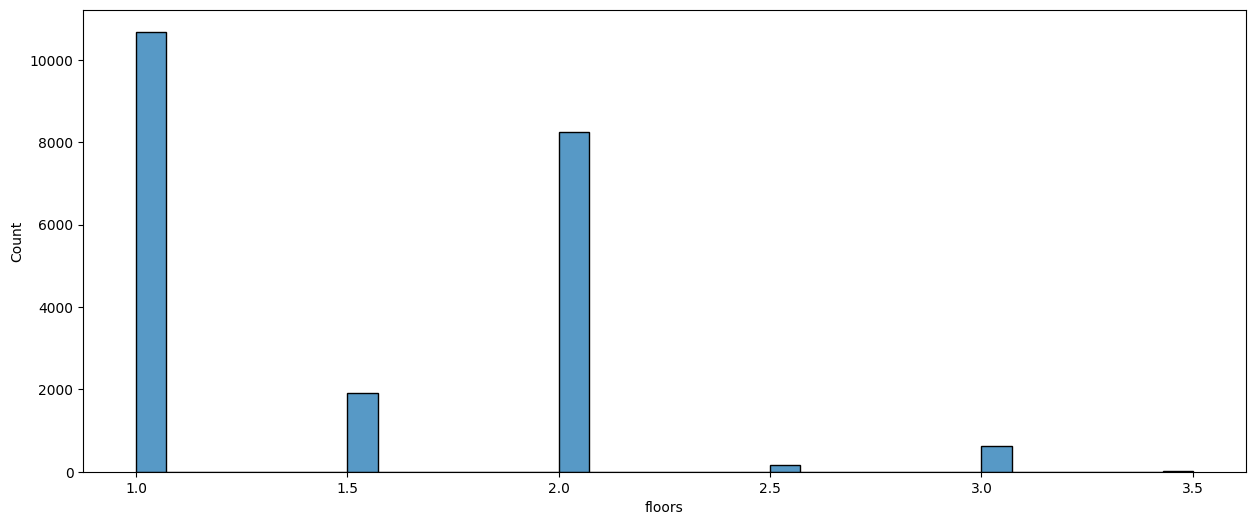

In [10]:
plt.figure(figsize=(15, 6))
sns.histplot(x=df['floors'])

### 2.2 Изучите распределение состояния домов

In [11]:
date_3 = df['condition'].value_counts()
date_3

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

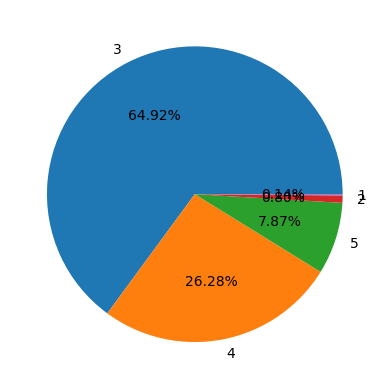

In [12]:
names_3 = date_3.index
valus_3 = date_3.values
plt.pie(valus_3, labels=names_3, autopct='%.2f%%');

2/3 квартир имеют удовлетворительное состояние, 1/4 - хорошее, почти 8% - отличное, и плохое и очень плохое имеют менее 1% квартир.

## Задание 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [13]:
corr_matrix = df.corr()
corr_matrix

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10556\2355143037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010830,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477616,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685363,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876644,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183511,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523899,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072074,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167648,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158206,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [20]:
# sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm')
# Получается нечитабельная тепловая карта

В матрице корреляций по столбцу price смотрим коэффициенты корреляции характеристик квартиры и выявляем те, которые обладают заметными связями с ценой (выше 0,5): sqft_living (0.702035), grade (0.667434), sqft_above (0.605567), sqft_living15 (0.585379), bathrooms (0.525138). Остальные характистики умеренные и слабые. 

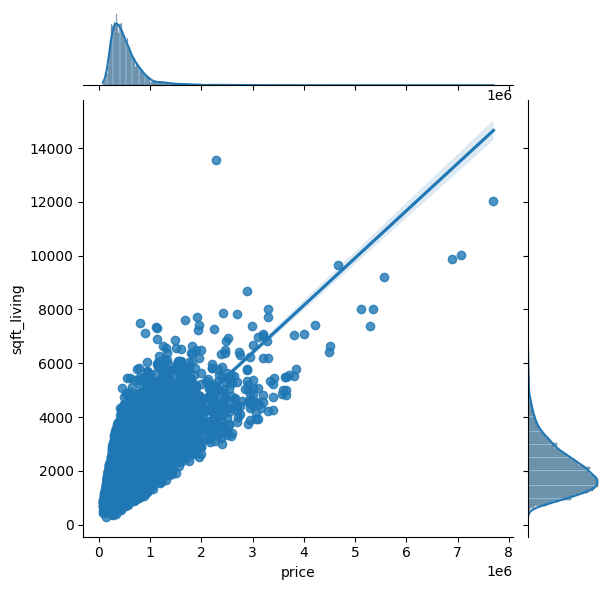

In [15]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')

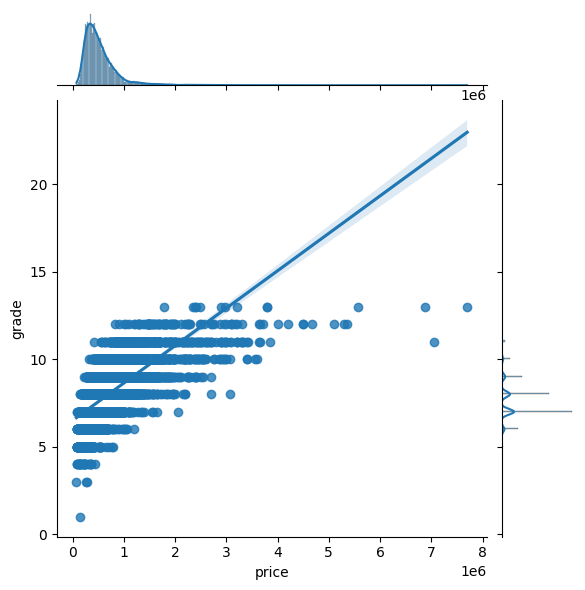

In [16]:
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')

В целом можно сказать, что от качества конструкций и дизайна зависит цена квартиры, т.е. чем ниже качество, тем ниже цена. При этом средние оценки присутствуют во всем основных ценовых категориях. В задании 1.2 мы изучали стоимость жилья и 14 тысяч квартир находятся в диапазоне до 500 тысяч. И по графику видно, что данную ценовую категорию попали оценки от 1 до 11. 

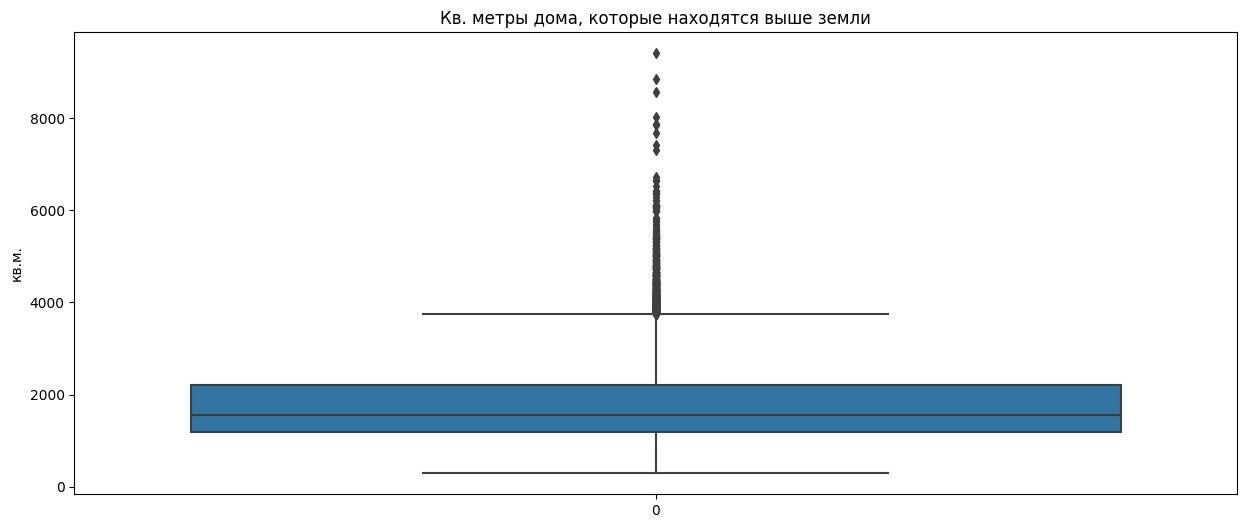

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df['sqft_above'])
plt.title('Кв. метры дома, которые находятся выше земли')
# plt.xlabel('')
plt.ylabel('кв.м.');

<Axes: xlabel='grade', ylabel='price'>

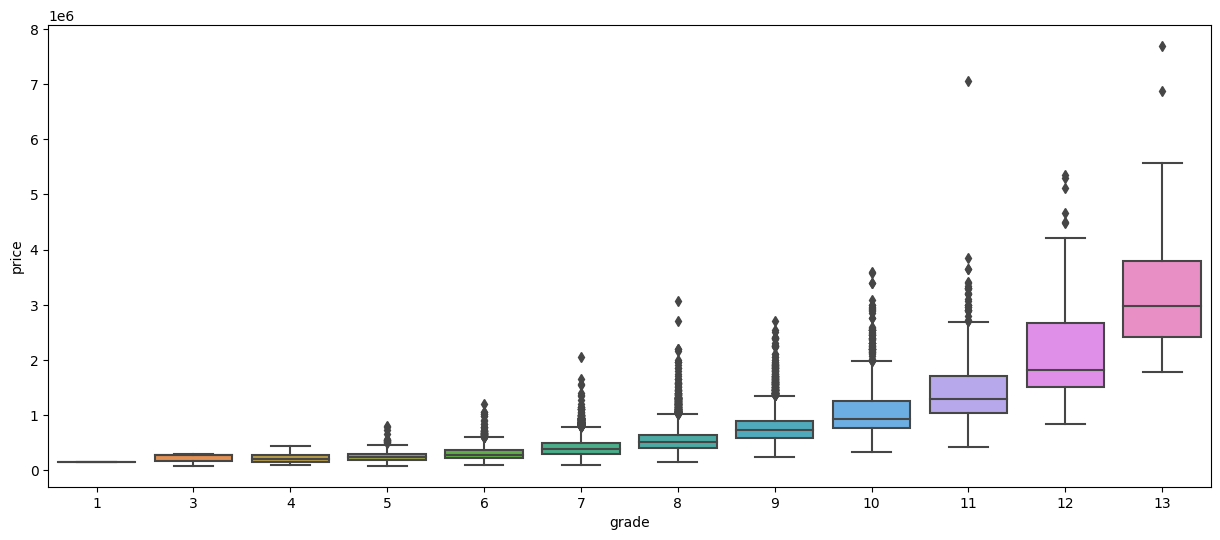

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['grade'], y=df['price'], whis=1.5)


По графику видно, что чем выше оценка качества конструкций и дизайна, тем выше находится ящик, т.е. квартиры с высоким качеством стоят дороже.

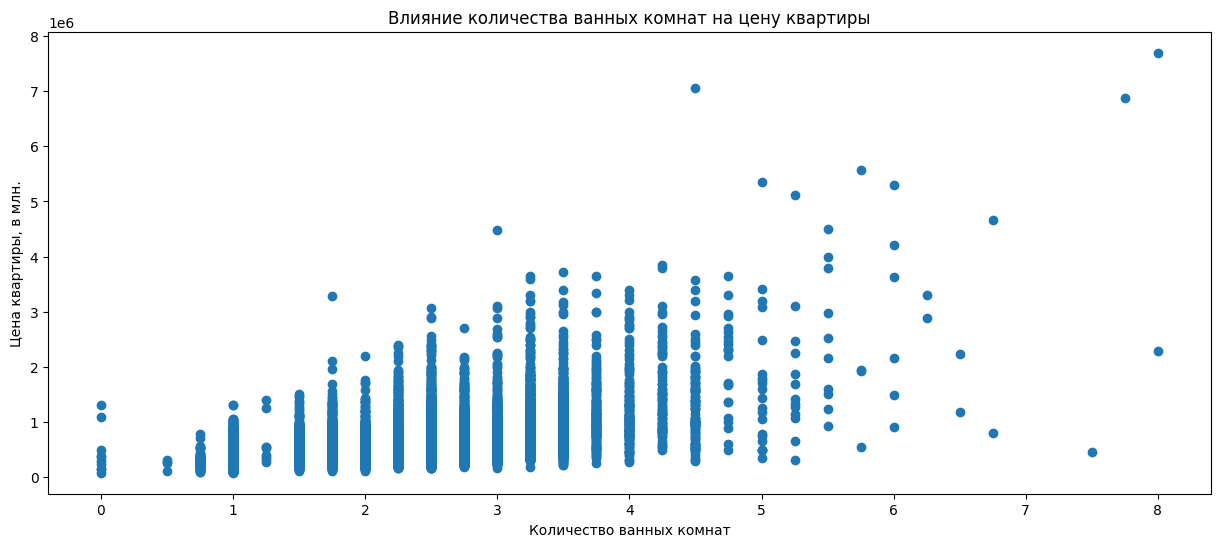

In [25]:
plt.figure(figsize=(15, 6))
plt.scatter(df['bathrooms'], df['price'])
plt.title('Влияние количества ванных комнат на цену квартиры')
plt.xlabel('Количество ванных комнат')
plt.ylabel('Цена квартиры, в млн.');

Количество ванных комнат не оказывает сильного влияния на цену квартиры. 